# clusterizacion


In [3]:
import sys
sys.path.append("../scripts/")
from funciones_paralectura import carga_de_datos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [33]:
# carga de caminata aleatoria
documento = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW5.mat'
comentarios = ['discharge (random walk)',
               'rest (random walk)',
               'rest post random walk discharge']
for s in comentarios: print(s)
comentario_final = ['charge (after random walk discharge)']
for s in comentario_final: print(s)
t, v, c, temp, T = carga_de_datos(documento, comentarios, comentario_final, nofinal=False)

discharge (random walk)
rest (random walk)
rest post random walk discharge
charge (after random walk discharge)
['discharge (random walk)', 'rest (random walk)', 'rest post random walk discharge']
final:  11616
6847.03 low current discharge at 0.04A
0
192927.16999999998 reference charge
204910.65 reference discharge
212002.78 reference charge
223339.04 reference discharge
241814.92 pulsed load (rest)
243014.94999999998 pulsed load (discharge)
243614.92 pulsed load (rest)
244814.94999999998 pulsed load (discharge)
245414.92 pulsed load (rest)
246614.94999999998 pulsed load (discharge)
247214.91999999998 pulsed load (rest)
248414.94999999998 pulsed load (discharge)
249014.91999999998 pulsed load (rest)
250214.94999999998 pulsed load (discharge)
250814.91999999998 pulsed load (rest)
252014.94999999998 pulsed load (discharge)
252614.91999999998 pulsed load (rest)
253814.94999999998 pulsed load (discharge)
254414.91999999998 pulsed load (rest)
255614.94999999998 pulsed load (discharge)
2562

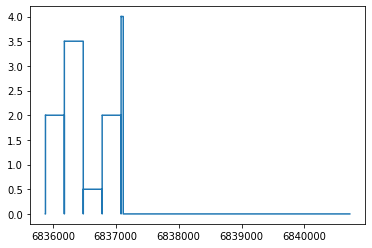

In [34]:
# print(t.keys())
plt.plot(t[400], c[400])

In [35]:
def guardar_serie_entre(serie, ti, deltaT, tamanno=0):
    arr = []
        
    fin = ti + deltaT
    if fin > len(serie): fin = len(serie) - 1
    ej = serie[ti]
    i = 0
    epsilon = 0.1

    
    if tamanno != 0: i = fin - tamanno
    else:
        for idx in range(40):
            if serie[ti - idx] > ej:
                ej = serie[ti - idx]
                i = idx
            elif serie[ti - idx] < ej - epsilon: break
        i = ti - i
    
    if i < 0: return np.array(serie[:fin])
    
    return np.array(serie[i : fin])

In [36]:
# creacion de vectores de diferencia de consumo de corriente

# creacion de diccionarios para guardar datos
centro_c = {}
t_salto = {}
pot = {}
pot_salto = {}
dif_salto_c = {}
centro_salto_c = {}
tiempo = {}
ciclo_salto = {}

# saltos = {}
# j = 0

arr_dif_salto_c = []
arr_pot_salto  = []
arr_centro_salto_c  = []
arr_ciclo_salto = []

arr_voltaje_salto = []
arr_corriente_salto = []
arr_tiempo_salto = []
arr_temperatura_salto = []

dx = 90

for i in c.keys():
#     if i == 0: continue
    if i == len(c.keys()) - 1: break
#     print(i)
    # creacion de vectores para guardar datos
    dif_salto_c[i] = []
    centro_c[i] = []
    centro_salto_c[i] = []
    t_salto[i] = []
    pot[i] = []
    pot_salto[i] = []
    tiempo[i] = []
    ciclo_salto[i] = []
    
    # condiciones iniciales
    anterior = 0
    POT = 0
    t_anterior = t[i][0]
    aux_t = 0
    ti = 0
    
    for idx, elem in enumerate(c[i]):
        # lectura de serie de tiempo
        
        dt = t[i][idx] - t_anterior # dt como variable auxiliar
        t_anterior = t[i][idx]
        POT += c[i][idx] * v[i][idx] * dt # se calcula la potencia integrando en el tiempo
        aux_t += dt # su acumulacion de tiempo
        
        centro_c[i].append((elem + anterior) / 2) # centro del salto
        pot[i].append(POT)
        tiempo[i].append(aux_t)
        
        if (elem - anterior >= 0.1):# or (elem - anterior <= -0.1):
            
            # solo entra si ocurre un salto
            
            dif_salto_c[i].append(elem - anterior) # magnitud del salto
            pot_salto[i].append(POT) # energia entregada al momento del salto
            centro_salto_c[i].append((elem + anterior) / 2) # media del salto
            t_salto[i].append(aux_t) # tiempo en que ocurre el salto
            ciclo_salto[i].append(i)
            
#             saltos[j] = {'ciclo': i,
#                         'energia': POT,
#                         'media': (elem + anterior) / 2,
#                         'magnitud': elem - anterior}
            
            arr_dif_salto_c.append(elem - anterior)
            arr_pot_salto.append(POT)
            arr_centro_salto_c.append((elem + anterior) / 2)
            arr_ciclo_salto.append(i)
            
            # como guardar la serie de tiempo de voltaje, corriente y temperatura 
            # del salto en un intervalo de tiempo
            dx = 90
            di = 10
            
            aux = guardar_serie_entre(v[i], idx, 2*dx)
            arr_voltaje_salto.append(aux)
            arr_corriente_salto.append(guardar_serie_entre(c[i], idx, 2*dx, tamanno=len(aux)))
            arr_tiempo_salto.append(guardar_serie_entre(t[i], idx, 2*dx, tamanno=len(aux)))
            arr_temperatura_salto.append(guardar_serie_entre(temp[i], idx, 2*dx, tamanno=len(aux)))
            
            ti = idx

        anterior = elem


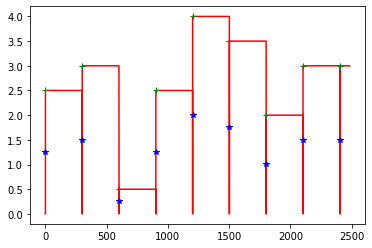

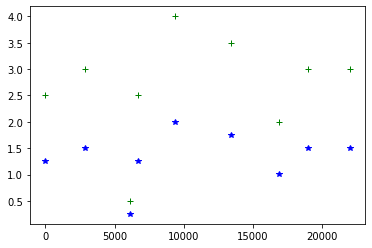

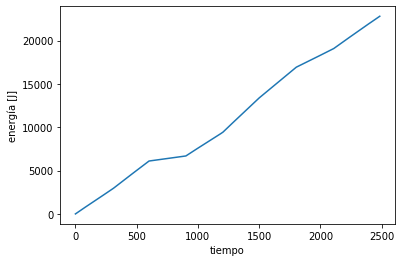

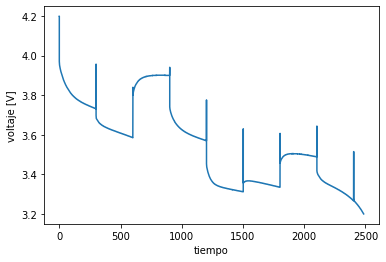

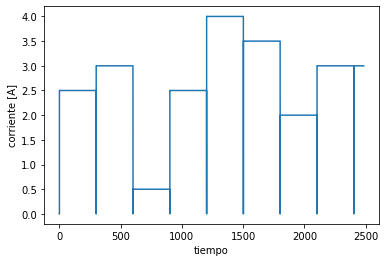

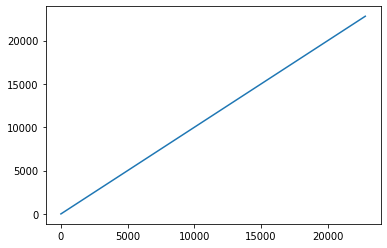

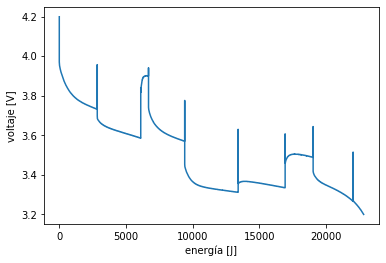

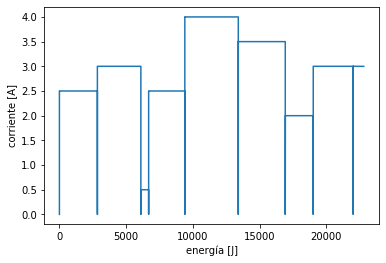

([<matplotlib.lines.Line2D at 0x1ed43bea160>],
 Text(17.200000000000003, 0.5, 'corriente [A]'),
 Text(0.5, 17.700000000000003, 'energía [J]'),
 None)

In [37]:

plt.plot(tiempo[2], c[2], color='r')
plt.plot(t_salto[2], dif_salto_c[2], '+g')
plt.plot(t_salto[2], centro_salto_c[2], '*b'), plt.show()

plt.plot(pot_salto[2], dif_salto_c[2], '+g')
plt.plot(pot_salto[2], centro_salto_c[2], '*b'), plt.show()

plt.plot(tiempo[2], pot[2]), plt.ylabel('energía [J]'), plt.xlabel('tiempo'), plt.show()
plt.plot(tiempo[2], v[2]), plt.ylabel('voltaje [V]'), plt.xlabel('tiempo'), plt.show()
plt.plot(tiempo[2], c[2]), plt.ylabel('corriente [A]'), plt.xlabel('tiempo'), plt.show()

plt.plot(pot[2], pot[2]), plt.show()
plt.plot(pot[2], v[2]), plt.ylabel('voltaje [V]'), plt.xlabel('energía [J]'), plt.show()
plt.plot(pot[2], c[2]), plt.ylabel('corriente [A]'), plt.xlabel('energía [J]'), plt.show()


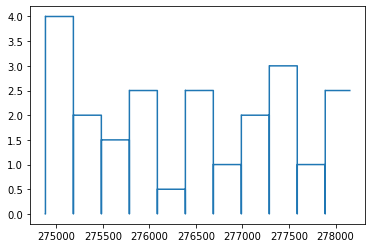

V:  4.199 3.522
C:  0.0 4.0
V:  3.842 3.744
C:  0.0 2.0
V:  3.879 3.752
C:  0.0 1.5
V:  3.854 3.569
C:  0.0 2.5
V:  3.747 3.787
C:  0.0 0.5
V:  3.828 3.495
C:  0.0 2.5
V:  3.683 3.658
C:  0.0 1.001
V:  3.737 3.502
C:  0.0 2.0
V:  3.657 3.329
C:  0.0 3.0


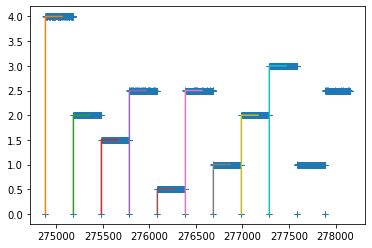

289667.97000000003 289847.00999999995
289968.56 290147.6
0.0 0.5
0.0 2.5
289066.76999999996 291552.0
0 2.999


In [38]:
plt.plot(t[1], c[1]), plt.show()
plt.plot(t[1], c[1], '+')#, plt.show()
# plt.plot(t[2], c[2], '-r')
# plt.plot(t[1], v[1]), plt.show()
# plt.plot(t[2], c[2]), plt.show()
# plt.plot(t[2], v[2]), plt.show()
for i in range(9):
#     print(len(arr_voltaje_salto[i]))
    print('V: ', arr_voltaje_salto[i][0], arr_voltaje_salto[i][-1])
    print('C: ', arr_corriente_salto[i][0], arr_corriente_salto[i][-1])
#     plt.plot(arr_tiempo_salto[i], arr_voltaje_salto[i]), plt.show()
    plt.plot(arr_tiempo_salto[i], arr_corriente_salto[i])#, plt.show()
plt.show()

print(arr_tiempo_salto[13][0], arr_tiempo_salto[13][-1])
print(arr_tiempo_salto[14][0], arr_tiempo_salto[14][-1])

print(arr_corriente_salto[13][0], arr_corriente_salto[13][-1])
print(arr_corriente_salto[14][0], arr_corriente_salto[14][-1])

print(t[2][0], t[2][-1])
print(c[2][0], c[2][-1])

In [39]:
import pandas as pd
saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}
df = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])
df['voltaje'] = [x for x in arr_voltaje_salto]
df['corriente'] = [x for x in arr_corriente_salto]
df['temperatura'] = [x for x in arr_temperatura_salto]
df['tiempo'] = [x for x in arr_tiempo_salto]
df.head()

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo
0,1,0.614047,4.005,2.0025,"[4.199, 3.833, 3.809, 3.801, 3.795, 3.789, 3.7...","[0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0, 4.0,...","[20.61039, 20.61039, 20.62594, 20.62594, 20.62...","[274884.5, 274884.54, 274885.54000000004, 2748..."
1,1,4266.690109,2.007,1.0035,"[3.842, 3.683, 3.688, 3.693, 3.698, 3.701, 3.7...","[0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.21202, 28.21202, 28.24...","[275184.7, 275184.74, 275185.74, 275186.74, 27..."
2,1,6510.697143,1.503,0.7515,"[3.879, 3.763, 3.762, 3.763, 3.763, 3.763, 3.7...","[0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.501, 1.5, 1...","[28.36748, 28.36748, 28.35193, 28.35193, 28.35...","[275485.35, 275485.39, 275486.38999999996, 275..."
3,1,8200.072656,2.504,1.2520,"[3.854, 3.657, 3.652, 3.65, 3.648, 3.646, 3.64...","[0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2.5, 2.5, 2...","[27.23267, 27.23267, 27.23267, 27.23267, 27.21...","[275785.81, 275785.85, 275786.85000000003, 275..."
4,1,10884.859898,0.504,0.2520,"[3.747, 3.708, 3.711, 3.715, 3.717, 3.72, 3.72...","[0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.08...","[276086.28, 276086.33, 276087.33, 276088.32999..."


In [40]:
df['temp_ini'] = [x[0] for x in df['temperatura']]
df.head()

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini
0,1,0.614047,4.005,2.0025,"[4.199, 3.833, 3.809, 3.801, 3.795, 3.789, 3.7...","[0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0, 4.0,...","[20.61039, 20.61039, 20.62594, 20.62594, 20.62...","[274884.5, 274884.54, 274885.54000000004, 2748...",20.61039
1,1,4266.690109,2.007,1.0035,"[3.842, 3.683, 3.688, 3.693, 3.698, 3.701, 3.7...","[0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.21202, 28.21202, 28.24...","[275184.7, 275184.74, 275185.74, 275186.74, 27...",28.18093
2,1,6510.697143,1.503,0.7515,"[3.879, 3.763, 3.762, 3.763, 3.763, 3.763, 3.7...","[0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.501, 1.5, 1...","[28.36748, 28.36748, 28.35193, 28.35193, 28.35...","[275485.35, 275485.39, 275486.38999999996, 275...",28.36748
3,1,8200.072656,2.504,1.2520,"[3.854, 3.657, 3.652, 3.65, 3.648, 3.646, 3.64...","[0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2.5, 2.5, 2...","[27.23267, 27.23267, 27.23267, 27.23267, 27.21...","[275785.81, 275785.85, 275786.85000000003, 275...",27.23267
4,1,10884.859898,0.504,0.2520,"[3.747, 3.708, 3.711, 3.715, 3.717, 3.72, 3.72...","[0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.08...","[276086.28, 276086.33, 276087.33, 276088.32999...",28.07212


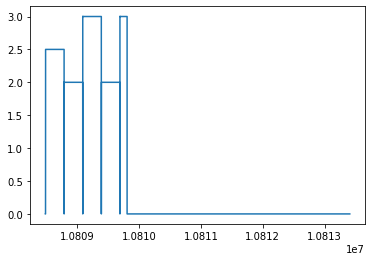

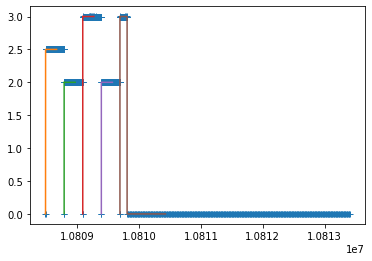

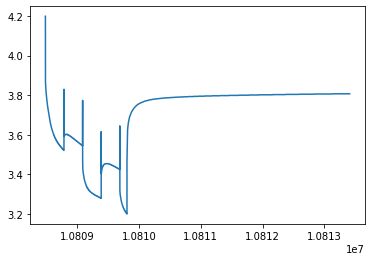

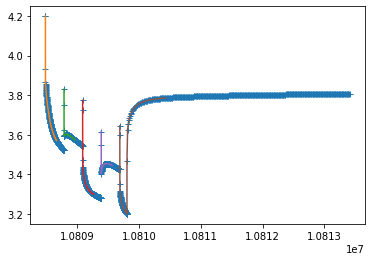

In [41]:
idx = 600
plt.plot(t[idx], c[idx]), plt.show()
plt.plot(t[idx], c[idx], '+')

tiemposs = df.loc[(df['ciclo'] == idx), 'tiempo'].values
corrientos = df.loc[(df['ciclo'] == idx), 'corriente'].values

for i, tempp in enumerate(tiemposs):
    plt.plot(tempp, corrientos[i])#, plt.show()#, plt.show()
plt.show()

plt.plot(t[idx], v[idx]), plt.show()
plt.plot(t[idx], v[idx], '+')

tiemposs = df.loc[(df['ciclo'] == idx), 'tiempo'].values
voltajos = df.loc[(df['ciclo'] == idx), 'voltaje'].values

for i, tempp in enumerate(tiemposs):
    plt.plot(tempp, voltajos[i])#, plt.show()#, plt.show()
plt.show()


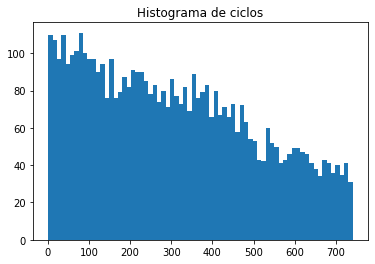

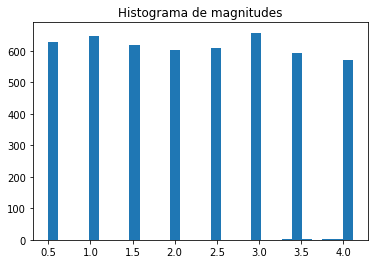

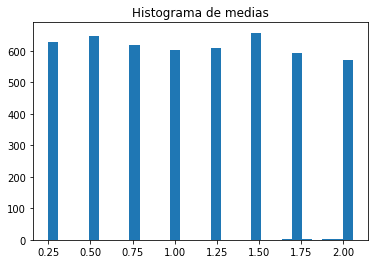

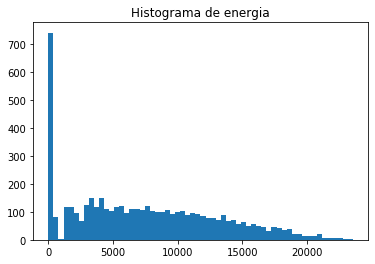

((array([741.,  81.,   2., 118., 116.,  97.,  69., 126., 148., 118., 150.,
         109., 103., 118., 121.,  96., 109., 111., 106., 122., 103.,  98.,
          98., 107.,  93., 101., 102.,  90.,  97.,  94.,  85.,  79.,  78.,
          72.,  87.,  68.,  72.,  57.,  65.,  49.,  55.,  48.,  45.,  32.,
          46.,  41.,  35.,  38.,  22.,  20.,  15.,  13.,  13.,  19.,   8.,
           8.,   6.,   5.,   3.,   3.]),
  array([8.30457620e-02, 3.92591180e+02, 7.85099313e+02, 1.17760745e+03,
         1.57011558e+03, 1.96262371e+03, 2.35513185e+03, 2.74763998e+03,
         3.14014812e+03, 3.53265625e+03, 3.92516438e+03, 4.31767252e+03,
         4.71018065e+03, 5.10268878e+03, 5.49519692e+03, 5.88770505e+03,
         6.28021319e+03, 6.67272132e+03, 7.06522945e+03, 7.45773759e+03,
         7.85024572e+03, 8.24275385e+03, 8.63526199e+03, 9.02777012e+03,
         9.42027826e+03, 9.81278639e+03, 1.02052945e+04, 1.05978027e+04,
         1.09903108e+04, 1.13828189e+04, 1.17753271e+04, 1.21678352e+04,


In [42]:
# analisis estadistico de los ciclos: ploteo de histogramas
plt.hist(df['ciclo'], bins=70), plt.title('Histograma de ciclos'), plt.show()
plt.hist(df['magnitud'], bins=30), plt.title('Histograma de magnitudes'), plt.show()
plt.hist(df['media'], bins=30), plt.title('Histograma de medias'), plt.show()
plt.hist(df['energia'], bins=60), plt.title('Histograma de energia'), plt.show()

In [43]:
# definiendo features
def primera_derivada(arr_serie):
    aux = []
    for serie in arr_serie:
        aux2 = list(serie[:-1] - serie[1:])
        if len(aux2) == 0: aux2 = [0]
        aux.append(aux2)
    return aux

#Delta tiempo
def deltaT(arr_serie, magnitud):
    aux = []
    for i in range(len(arr_serie)):
        if min(arr_serie[i])>0:
            delta = abs(arr_serie[i][-1]-arr_serie[i][0])/magnitud[i]
        else:
            delta = None
        aux.append(delta)   
    return aux

#Efecto capacitivo

#validacion
def Valid_data(data):
    if len(data)>100:
        ini = (data[15]-data[7]) > 0 
        final = [False,0]
        aux = 0
        index = 0
        if ini == True:
            for i in range(len(data)-1):
                if (data[i+1]-data[i]) <=0 :
                    if aux == 0:
                        index = i
                    aux += 1
                    if aux == 25:
                        final = [True,index]
                        break
                else:
                    aux = 0
        if ini == True and final[0] == True:
            return [True,final[1]]
        else:
            return [False,0]
    else:
        return [False,0]

    
def segunda_derivada(data):
    aux = []
    for i in data:
        valid = Valid_data(i)
        if valid[0] == True:
            inf = valid[1]
            der_mean = np.mean(np.diff(i[:inf]))
            aux.append(der_mean)
        else:
            aux.append(-1)
    return aux
                                   
def RC(data,time,ind):
    aux = []
    aux_2 = []
    for i in range(len(data)):
        valid = Valid_data(data[i])
        if valid[0] == True:
            inf = valid[1]
            Rc = (time[i][inf]-time[i][0])*0.632
            aux.append(Rc)
        else:
            aux.append(0)
    n = max(ind)
    k = 0
    for i in range(n-1):
        ind_aux = np.where(ind.values ==i+1)
        k += len(ind_aux[0])
        if len(ind_aux[0]) > 0:
            ini_aux = ind_aux[0][0]
            final_aux = ind_aux[0][-1]
            #print(ini_aux,final_aux)
            mean = np.mean(aux[ini_aux:final_aux])    
            kk = [mean]*len(ind_aux[0])
            aux_2 = np.append(aux_2, kk)
        else:
            aux_2 = np.append(aux_2, 0)
    return [aux,aux_2]




In [46]:
# obtener features
df["F1"] = [np.mean(x[:1]) for x in primera_derivada(df["voltaje"])]
df["F2"] = [x for x in deltaT(df["temperatura"],df["magnitud"])]   #Diferencia de temperatura
df["F3"] = [x for x in segunda_derivada(df["voltaje"])]  # segunda derivada
RC_test = RC(df["voltaje"],df["tiempo"],df["ciclo"])
df["F4"] = [x for x in RC_test[0]]   # circuito RC
#df["F5"] = [x for x in RC_test[1]]
#df

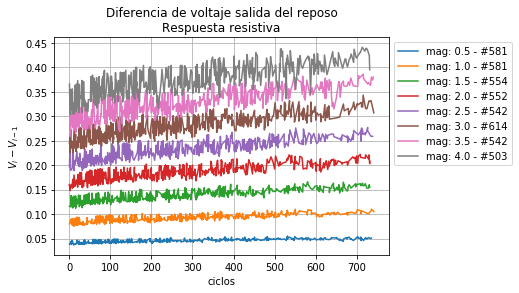

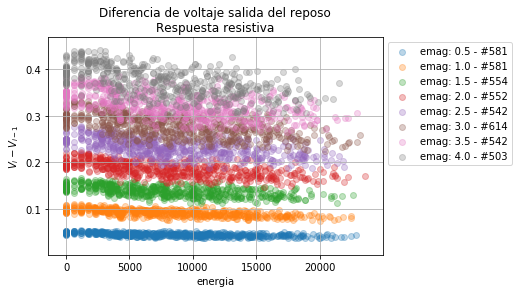

(<matplotlib.legend.Legend at 0x1ed46081320>, None, None)

In [47]:
WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 0.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 4.0 - #' + str(len(df_aux)))
plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()



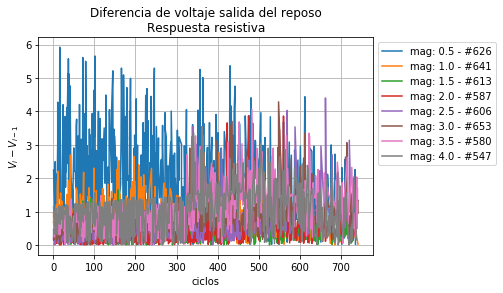

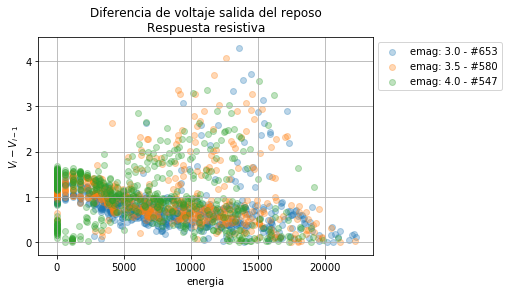

(<matplotlib.legend.Legend at 0x1ed45c1def0>, None, None)

In [45]:
#Graficos F2
WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 0.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 3.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 3.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 4.0 - #' + str(len(df_aux)))
plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
# df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F1'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F1'] = df_aux['F2'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

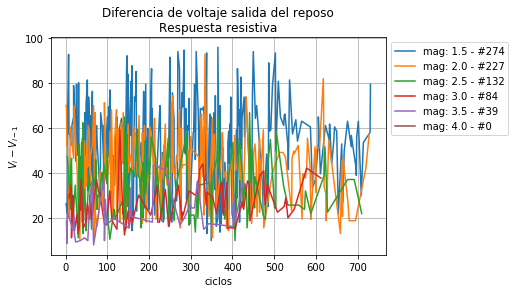

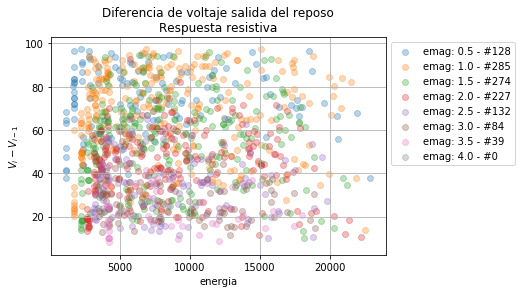

(<matplotlib.legend.Legend at 0x1ed45389978>, None, None)

In [57]:
#Graficos F4
# WIN = 1
# alpha = 0.3
# df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
# df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01) ]
# df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 0.5 - #' + str(len(df_aux)))

# df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
# df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
# df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 3.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 3.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 4.0 - #' + str(len(df_aux)))

plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F1'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

In [58]:
def plot_energia_magnitud(df, m, ei, ef, WIN, alpha):
    df_aux = df[(df['magnitud'] >= m - 0.2) & (df['magnitud'] <= m + 0.2)]
    df_aux = df_aux[(df['energia'] >= ei) & (df['energia'] <= ef)]
    df_aux = df_aux[df_aux['F4'] > 0.01]
    df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
    plt.plot(df_aux['ciclo'], df_aux['F4'],
             label='mag: ' + str(m) + ' - #' + str(len(df_aux)) + ' i: ' + str(ei) + '-' + str(ef))
    

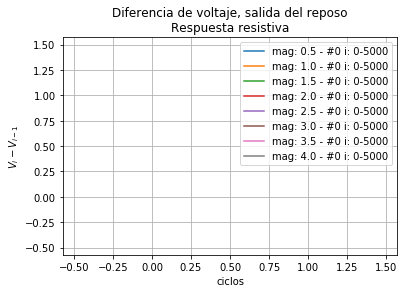

(<matplotlib.legend.Legend at 0x1ed42f3dd30>, None, None)

In [59]:
WIN = 1
plot_energia_magnitud(df_aux, 0.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 1.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 1.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 2.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 2.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 3.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 3.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 4.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 20000, 25000, WIN, alpha)
plt.title('Diferencia de voltaje, salida del reposo\nRespuesta resistiva')
plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()


In [16]:
# comportamiento de potencia instantanea entregada
def potencia_instantanea_salto(arr_voltaje, arr_corriente, limite=10):
    aux = np.zeros(len(arr_voltaje))
    for i, serie in enumerate(arr_corriente):
        contador = 0
        for j, c in enumerate(serie):
            if c != 0 and aux[i] == 0:
                aux[i] = c * arr_voltaje[i][j]
                contador = 1
            elif contador < limite:
                aux[i] += c * arr_voltaje[i][j]
                contador += 1
            elif contador == limite: break
            
    return aux

In [17]:
df['F1'] = potencia_instantanea_salto(df['voltaje'], df['corriente'], limite=1)


,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,F1
0,1,0.164644,1.001,0.5005,"[4.199, 4.112, 4.107, 4.105, 4.103, 4.102, 4.1...","[0.0, 1.001, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1...","[21.71795, 21.71795, 21.71795, 21.71795, 21.70...","[278966.17, 278966.20999999996, 278967.2099999...",4.116112
1,1,1212.635337,1.504,0.7520,"[4.101, 3.972, 3.965, 3.963, 3.962, 3.962, 3.9...","[0.0, 1.504, 1.5, 1.499, 1.5, 1.5, 1.5, 1.5, 1...","[22.13843, 22.13843, 22.13843, 22.13843, 22.15...","[279266.37, 279266.41, 279267.41000000003, 279...",5.973888
2,1,2973.596869,2.005,1.0025,"[4.012, 3.844, 3.835, 3.834, 3.833, 3.832, 3.8...","[0.0, 2.005, 1.999, 2.0, 2.0, 2.0, 2.0, 2.0, 2...","[23.04167, 23.04167, 23.04167, 23.04167, 23.04...","[279566.52, 279566.56, 279567.56, 279568.56, 2...",7.707220
3,1,5241.913356,3.504,1.7520,"[3.917, 3.632, 3.615, 3.611, 3.607, 3.604, 3.6...","[0.0, 3.504, 3.5, 3.5, 3.5, 3.5, 3.5, 3.501, 3...","[24.52113, 24.52113, 24.53671, 24.53671, 24.55...","[279866.99, 279867.02999999997, 279868.0299999...",12.726528
4,1,8929.195524,1.501,0.7505,"[3.755, 3.643, 3.646, 3.65, 3.654, 3.657, 3.66...","[0.0, 1.501, 1.501, 1.5, 1.5, 1.5, 1.5, 1.5, 1...","[28.46116, 28.46116, 28.47673, 28.47673, 28.49...","[280167.22, 280167.26, 280168.25999999995, 280...",5.468143
5,1,10595.421277,2.002,1.0010,"[3.809, 3.661, 3.658, 3.657, 3.656, 3.655, 3.6...","[0.0, 2.002, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.0874, 28.0874, 28.0874, 28.07183, 28.07183...","[280467.54, 280467.58, 280468.57999999996, 280...",7.329322
6,1,12764.781827,3.004,1.5020,"[3.745, 3.519, 3.512, 3.51, 3.508, 3.507, 3.50...","[0.0, 3.004, 3.0, 3.0, 3.0, 2.999, 2.999, 3.0,...","[28.04069, 28.04069, 28.04069, 28.04069, 28.04...","[280768.01999999996, 280768.06, 280769.0600000...",10.571076
7,1,15867.082442,4.003,2.0015,"[3.655, 3.354, 3.344, 3.341, 3.339, 3.337, 3.3...","[0.0, 4.003, 4.0, 4.0, 4.0, 4.0, 3.999, 4.001,...","[29.92505, 29.92505, 29.94062, 29.94062, 29.95...","[281068.52, 281068.56, 281069.56, 281070.56, 2...",13.426062
8,1,19800.675766,4.002,2.0010,"[3.563, 3.268, 3.26, 3.259, 3.257, 3.257, 3.25...","[0.0, 4.002, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0...","[34.42869, 34.42869, 34.44411, 34.45953, 34.45...","[281369.1, 281369.14, 281370.13999999996, 2813...",13.078536
9,2,0.322403,2.003,1.0015,"[4.199, 4.024, 4.013, 4.01, 4.007, 4.005, 4.00...","[0.0, 2.003, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[21.48435, 21.46878, 21.46878, 21.46878, 21.46...","[291852.05, 291852.09, 291853.08999999997, 291...",8.060072


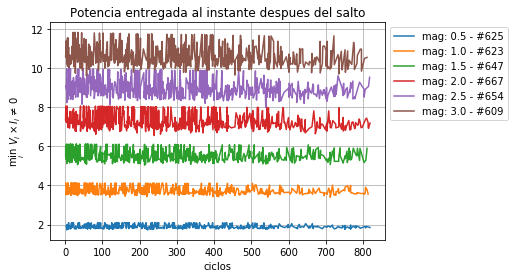

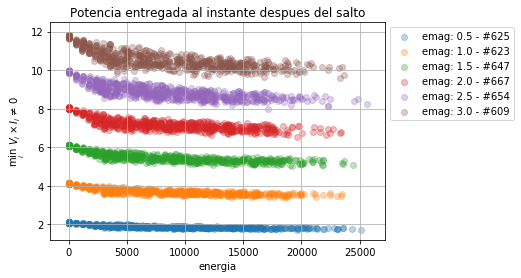

(<matplotlib.legend.Legend at 0x7f5c841327b8>, None, None)

In [18]:
WIN = 1
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 0.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.0 - #' + str(len(df_aux)))

# df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.5 - #' + str(len(df_aux)))

# df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 4.0 - #' + str(len(df_aux)))
plt.xlabel('ciclos')
plt.ylabel(r'$\min_i \ V_i \times I_i \ \ne \ 0$')
plt.title('Potencia entregada al instante despues del salto')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$\min_i \ V_i \times I_i \ \ne \ 0$')
plt.title('Potencia entregada al instante despues del salto')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()



/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


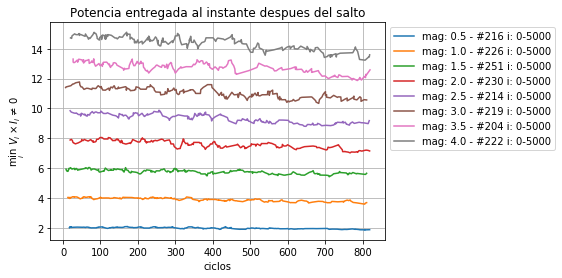

(<matplotlib.legend.Legend at 0x7f5c865d08d0>, None, None)

In [19]:
WIN = 5
plot_energia_magnitud(df, 0.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 1.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 1.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 2.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 2.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 3.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 3.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 4.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 20000, 25000, WIN, alpha)
plt.ylabel(r'$\min_i \ V_i \times I_i \ \ne \ 0$')
plt.title('Potencia entregada al instante despues del salto')
plt.xlabel('ciclos')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()


In [20]:
def tiempo_a_inflexion(arr_voltaje):
    """
    funcion que entrega el tiempo necesario a la inflexion
    """
    
    
    
    return

Trabajo próximo:
- guardar curvas hasta el salto anterior (instante antes de 0)
- guardar voltaje anterior como etiqueta
- guardar temperatura inicial como etiqueta
- Para feature de degradación usar delta T del salto completo (inicio - fin)
- Ver fenomenolgía del circuito RC, ajustar función de transferencia de modelo RC
    - para encontrar la constante de proporcionalidad, tomar curvas de voltaje 'estables' donde $V_{i+1} - V_{i} < \epsilon$
    - Encontrar constante de tiempo entre esas curvas
    asdasd

# Grafico de curva de salud

In [21]:
lista = [str('reference charge')]
final = [str('rest post reference charge')]
t_carga, v_carga, c_carga, temp_carga, T_carga = carga_de_datos(documento, lista, final, nofinal=True)

lista = [str('reference discharge')]
final = [str('rest post reference discharge')]
t_descarga, v_descarga, c_descarga, temp_descarga, T_descarga = carga_de_datos(documento, lista, final, nofinal=True)
print(len(t_descarga))

['reference charge']
final:  12826
6503.410000000001 low current discharge at 0.04A
0
197686.53 reference charge
208842.46 reference discharge
216075.45 reference charge
226891.06 reference discharge
245015.71 pulsed load (rest)
246215.74000000002 pulsed load (discharge)
246815.71000000002 pulsed load (rest)
248015.74000000002 pulsed load (discharge)
248615.71000000002 pulsed load (rest)
249815.74000000002 pulsed load (discharge)
250415.71000000002 pulsed load (rest)
251615.74000000002 pulsed load (discharge)
252215.71000000002 pulsed load (rest)
253415.74000000002 pulsed load (discharge)
254015.71000000002 pulsed load (rest)
255215.74000000002 pulsed load (discharge)
255815.71000000002 pulsed load (rest)
257015.74000000002 pulsed load (discharge)
257615.71000000002 pulsed load (rest)
258815.74000000002 pulsed load (discharge)
259415.71000000002 pulsed load (rest)
260615.74000000002 pulsed load (discharge)
261215.71000000002 pulsed load (rest)
262415.74000000005 pulsed load (discharge)

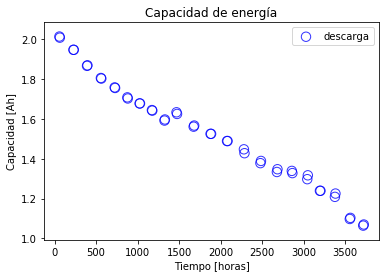

(Text(0.5, 1, 'Capacidad de energía'), None)

In [34]:
# integrar la descarga
energia_entregada = []
T = []
for k in t_descarga.keys():
    energia_entregada.append(sum(c_descarga[k]) / 360)
    T.append(np.min(t_descarga[k]) / 3600)
plt.scatter(T, energia_entregada, label='descarga', facecolor='none', s=88, edgecolors='b', alpha=0.8)
plt.ylabel('Capacidad [Ah]')
plt.xlabel('Tiempo [horas]')
plt.legend()
# plt.title('Capacidad de energía entregada por batería'), plt.show()

# integrar la carga
energia_entregada = []
T = []
for k in t_carga.keys():
    energia_entregada.append(sum(c_carga[k]) / 360)
    T.append(np.mean(t_carga[k]) / 3600)
# plt.scatter(T, np.abs(energia_entregada), label='carga', s=38, edgecolors='b', alpha=0.4)
plt.ylabel('Capacidad [Ah]')
plt.xlabel('Tiempo [horas]')
plt.legend()
plt.title('Capacidad de energía'), plt.show()

[ciclo, potencia, media y magnitud del salto] como identidad de un salto, a partir de ello obtener una respuesta dinamica con features